In [ ]:
## Gathering text for Google searches: Right now news only ##
### Need to make this a function ###

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir ('/Users/morganhogenmiller/Desktop/DA 401/Data sets')
Broadway_Original = pd.read_csv('broadway(corgi).csv') #Read in CORGI data set
Google_Parameters= Broadway_Original[['Name','Year','Month','Day','Type']] #Reduce data set to variables to input into GT

#Filter to shows after 2010 only
Google_Parameters=Google_Parameters.loc[Google_Parameters['Year']>2007] 
Google_Parameters=Google_Parameters.loc[Google_Parameters['Type']=='Musical'] 

#Provides a list of shows in form needed for function 
show_list=list(Google_Parameters.Name.unique()) 
show_list.sort() #in alphabetical order
print(len(show_list))

155


In [7]:
from textblob import TextBlob #Allows us to analyze subjectivity
from bs4 import BeautifulSoup
import requests

#search show
#subjectivity
#sentiment
#self.show=search show

class Analysis: #don't really understand the class portion of this
    def __init__(self, show):
        """
        This function initializes all of the objects used for gathering Google headlines and 
        sentiment analysis. It takes the parameters self and show. Self corresponds to the Google page of interest, and show is the search show whose headlines are going to be analyzed. 
        """
        self.show= show
                     #0=what want search show to be nws = news can filter by images ect
        self.sentiment=0
        self.url='https://www.google.com/search?q={0}&source=lnms&tbm=nws&as_qdr=y'.format(self.show)
        #print(self.url)
    def run(self):
        """
        The run function gathers the html document and the headlines for the url  for the search show identified and uses beautiful soup to 
        print the full html. It takes self as a parameter.
        """
        response=requests.get(self.url) #sends request to specific url and gets raw html
        print(response.text) #if you just say response, gives 200 
        soup=BeautifulSoup(response.text, 'html.parser')
        headline_results=soup.find_all('div',class_='st')
        for h in headline_results:
            blob = TextBlob(h.get_text()) #grabs the text in each headline
            self.sentiment += blob.sentiment.polarity / len(headline_results) #polarity between (0-1) of the 
        
a=Analysis('City of Stars')
a.run()
#print(a.show, 'Sentiment:',a.sentiment)

# Advanced search url
#https://www.google.com/search?hl=en&as_q=Hamilton+musical&as_epq=&as_oq=&as_eq=&as_nlo=&as_nhi=&lr=&cr=&as_qdr=y&as_sitesearch=&as_occt=any&safe=images&as_filetype=&as_rights=

# Regular search url
#https://www.google.com/search?q=Hamilton+musical&lr=&hl=en&tbas=0&source=lnt&sa=X&ved=0ahUKEwiRkvDarf3gAhVyjoMKHWDADGwQpwUIIw&biw=622&bih=721

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=City+of+Stars&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=GtGXXJTjJcHb5gKRyq_gAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=City+of+Stars&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=GtGXXJTjJcHb5gKRyq_gAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>City of Stars - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-al

In [8]:
#Making a dataframe with the sentiment scores of all of the shows
show_sent=[]
for i in show_list:
        a=Analysis(i)
        a.run()
        show_sent.append(a.sentiment)
        
show_sentimentality=pd.DataFrame({'Name':show_list ,'Sentimentality':show_sent})     
show_sentimentality
#https://www.google.com/search?biw=1260&bih=661&tbm=nws&ei=SxKJXJeMB-nNjwS-nIAg&q=the+king+and+i+2015+%28musical%29&oq=the+king+and+i+2015+%28musical%29&gs_l=psy-ab.3...3140.8942.0.9506.25.20.5.0.0.0.88.1155.20.20.0....0...1c.1.64.psy-ab..0.6.352...0j33i299k1.0.j9AH2UCvlTY
#    https://www.google.com/search?q=the+king+and+i+2015+(musical)&source=lnms&sa=X&ved=0ahUKEwij9PHfqP_gAhVNq4MKHToeBWEQ_AUICSgA&biw=1260&bih=661&dpr=2#

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=13&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=JdGXXOSwAY2n5gL0oKy4Bg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=13&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=JdGXXOSwAY2n5gL0oKy4Bg">here</a> if you are not redirected within a few seconds.</div></noscript><title>13 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}}a.gb1,a

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=9+To+5&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=JdGXXPuyFoLv5gLdspP4Ag" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=9+To+5&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=JdGXXPuyFoLv5gLdspP4Ag">here</a> if you are not redirected within a few seconds.</div></noscript><title>9 To 5 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:l

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=A+Catered+Affair&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=JtGXXK1yg7bmAsjXvegG" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=A+Catered+Affair&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=JtGXXK1yg7bmAsjXvegG">here</a> if you are not redirected within a few seconds.</div></noscript><title>A Catered Affair - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertic

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=A+Chorus+Line+%2706&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=JtGXXO69Fez45gK3v6XIAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=A+Chorus+Line+%2706&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=JtGXXO69Fez45gK3v6XIAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>A Chorus Line '06 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=A+Christmas+Story&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=JtGXXNjLLYWn5gKdibmgBw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=A+Christmas+Story&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=JtGXXNjLLYWn5gKdibmgBw">here</a> if you are not redirected within a few seconds.</div></noscript><title>A Christmas Story - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=A+Gentleman%27S+Guide+To+Love+And+Murder&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=J9GXXJOzBtHs5gLriofICA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=A+Gentleman%27S+Guide+To+Love+And+Murder&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=J9GXXJOzBtHs5gLriofICA">here</a> if you are not redirected within a few seconds.</div></noscript><title>A Gentleman'S Guide To Love And Murder - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolut

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=A+Little+Night+Music&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=J9GXXLbUH4it5wKt4rqwDQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=A+Little+Night+Music&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=J9GXXLbUH4it5wKt4rqwDQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>A Little Night Music - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-r

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=A+Night+With+Janis+Joplin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KNGXXKyOA4GC5wL9gqXIBQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=A+Night+With+Janis+Joplin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KNGXXKyOA4GC5wL9gqXIBQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>A Night With Janis Joplin - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{heigh

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=A+Tale+Of+Two+Cities&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KNGXXP3AFquK5wL6hqOIAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=A+Tale+Of+Two+Cities&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KNGXXP3AFquK5wL6hqOIAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>A Tale Of Two Cities - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-r

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=After+Midnight&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KNGXXNHHL-zR5gK8qrmACQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=After+Midnight&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KNGXXNHHL-zR5gK8qrmACQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>After Midnight - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Aladdin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KdGXXN2GCqfH5gLei7OYAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Aladdin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KdGXXN2GCqfH5gLei7OYAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Aladdin - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{floa

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=All+About+Me&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KdGXXM2qIMHy5gLcsbjYCA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=All+About+Me&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KdGXXM2qIMHy5gLcsbjYCA">here</a> if you are not redirected within a few seconds.</div></noscript><title>All About Me - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Allegiance&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KtGXXPS6BMid5wK347TgCA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Allegiance&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KtGXXPS6BMid5wK347TgCA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Allegiance - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Amazing+Grace&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KtGXXKT8GJKd5gK7zo-wDA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Amazing+Grace&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KtGXXKT8GJKd5gK7zo-wDA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Amazing Grace - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-al

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=American+Idiot&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KtGXXJWpOKOC5wLR7r3YBQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=American+Idiot&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=KtGXXJWpOKOC5wLR7r3YBQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>American Idiot - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=American+Psycho&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=K9GXXKWlEPL45gLh1qXYDw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=American+Psycho&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=K9GXXKWlEPL45gLh1qXYDw">here</a> if you are not redirected within a few seconds.</div></noscript><title>American Psycho - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;verti

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=An+American+In+Paris&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=K9GXXNy0Jcbv5gKtprLAAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=An+American+In+Paris&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=K9GXXNy0Jcbv5gKtprLAAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>An American In Paris - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-r

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Annie+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=K9GXXOnQPIPt5gLhtKLYAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Annie+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=K9GXXOnQPIPt5gLhtKLYAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Annie '12 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Anything+Goes+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LNGXXL25FIvs5gKajpPoAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Anything+Goes+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LNGXXL25FIvs5gKajpPoAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Anything Goes '11 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Avenue+Q&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LNGXXJfmKtDv5gKytorYCA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Avenue+Q&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LNGXXJfmKtDv5gKytorYCA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Avenue Q - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{f

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Baby+It%27S+You!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LdGXXO7LA4-J5wLP-IbYBA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Baby+It%27S+You!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LdGXXO7LA4-J5wLP-IbYBA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Baby It'S You! - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vert

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Beautiful:+The+Carole+King+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LdGXXLLiHKTI5gL-1p9w" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Beautiful:+The+Carole+King+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LdGXXLLiHKTI5gL-1p9w">here</a> if you are not redirected within a few seconds.</div></noscript><title>Beautiful: The Carole King Musical - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Big+Fish&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LdGXXKmiNMXU5gKCx4jIDQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Big+Fish&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LdGXXKmiNMXU5gKCx4jIDQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Big Fish - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{f

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Billy+Elliot:+The+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LtGXXNDkDLCL5wKU0o6gDQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Billy+Elliot:+The+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LtGXXNDkDLCL5wKU0o6gDQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Billy Elliot: The Musical - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{heigh

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Bloody+Bloody+Andrew+Jackson&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LtGXXI3nI8Xs5gK68puoAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Bloody+Bloody+Andrew+Jackson&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LtGXXI3nI8Xs5gK68puoAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Bloody Bloody Andrew Jackson - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Bonnie+And+Clyde&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LtGXXPLzN8jt5gK-_5DwBw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Bonnie+And+Clyde&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=LtGXXPLzN8jt5gK-_5DwBw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Bonnie And Clyde - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;ve

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Bright+Star&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=L9GXXJ3eDu7m5gLOiKywCw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Bright+Star&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=L9GXXJ3eDu7m5gLOiKywCw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Bright Star - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:to

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Bring+It+On+The+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=L9GXXKzVJLHZ5gLBqJGwAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Bring+It+On+The+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=L9GXXKzVJLHZ5gLBqJGwAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Bring It On The Musical - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Bullets+Over+Broadway&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=L9GXXLnkOqeu5wKd34L4Aw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Bullets+Over+Broadway&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=L9GXXLnkOqeu5wKd34L4Aw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Bullets Over Broadway - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margi

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Burn+The+Floor&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MNGXXLymEKPs5gLMxra4Aw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Burn+The+Floor&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MNGXXLymEKPs5gLMxra4Aw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Burn The Floor - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Bye+Bye+Birdie&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MNGXXICeJ6j45gLQs66ADQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Bye+Bye+Birdie&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MNGXXICeJ6j45gLQs66ADQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Bye Bye Birdie - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Cabaret+(musical)&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MdGXXPWlAY3J5gLk47uYBg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Cabaret+(musical)&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MdGXXPWlAY3J5gLk47uYBg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Cabaret (musical) - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Catch+Me+If+You+Can&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MdGXXMHiFrCD5wLGoKO4Ag" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Catch+Me+If+You+Can&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MdGXXMHiFrCD5wLGoKO4Ag">here</a> if you are not redirected within a few seconds.</div></noscript><title>Catch Me If You Can - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-righ

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Cats+2016&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MdGXXO3HLsyO5wKJsJ-wBw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Cats+2016&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MdGXXO3HLsyO5wKJsJ-wBw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Cats 2016 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gba

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Chaplin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MtGXXLy7CIKd5gLkr6OwDA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Chaplin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MtGXXLy7CIKd5gLkr6OwDA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Chaplin - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{floa

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Chicago&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MtGXXOHOIdHX5gLg063AAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Chicago&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MtGXXOHOIdHX5gLg063AAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Chicago - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{floa

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Cinderella&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MtGXXNHSO4XI5gL45amQCw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Cinderella&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=MtGXXNHSO4XI5gL45amQCw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Cinderella - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Come+Fly+Away&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=M9GXXMvgEqrv5gLr27awAg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Come+Fly+Away&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=M9GXXMvgEqrv5gLr27awAg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Come Fly Away - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-al

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Cry+Baby&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=M9GXXLPrKI2V5wLpvIeoCA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Cry+Baby&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=M9GXXLPrKI2V5wLpvIeoCA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Cry Baby - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{f

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Curtains&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NNGXXIV6xtfmAsO3jYgJ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Curtains&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NNGXXIV6xtfmAsO3jYgJ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Curtains - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Dames+At+Sea&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NNGXXLuBFunU5gKW06-oCA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Dames+At+Sea&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NNGXXLuBFunU5gKW06-oCA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Dames At Sea - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Disaster!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NNGXXKS7KKqq5wLvta_ABQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Disaster!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NNGXXKS7KKqq5wLvta_ABQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Disaster! - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gba

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Doctor+Zhivago&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NdGXXMW3BMLO5gLPoLuYBQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Doctor+Zhivago&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NdGXXMW3BMLO5gLPoLuYBQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Doctor Zhivago - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Dr.+Seuss%27+How+The+Grinch+Stole+Christmas!+07&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NdGXXN27GM205gLPypWgBw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Dr.+Seuss%27+How+The+Grinch+Stole+Christmas!+07&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NdGXXN27GM205gLPypWgBw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Dr. Seuss' How The Grinch Stole Christmas! 07 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{heig

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Elf&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NdGXXMLsLfLx5gLh6ZDIDw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Elf&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NdGXXMLsLfLx5gLh6ZDIDw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Elf - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}}a.gb

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Elf+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NtGXXPe3BqGE5wLppoGoCw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Elf+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NtGXXPe3BqGE5wLppoGoCw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Elf '12 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Everyday+Rapture&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NtGXXMyxHI2x5wLjjK3IAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Everyday+Rapture&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NtGXXMyxHI2x5wLjjK3IAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Everyday Rapture - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;ve

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Evita&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NtGXXNuWM5CL5wLh06yYAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Evita&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=NtGXXNuWM5CL5wLh06yYAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Evita - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Fela!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=N9GXXPv4CYf45gL9zKTYBQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Fela!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=N9GXXPv4CYf45gL9zKTYBQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Fela! - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Fiddler+On+The+Roof+2015&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=N9GXXI7VIOzO5gLarrXQBQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Fiddler+On+The+Roof+2015&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=N9GXXI7VIOzO5gLarrXQBQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Fiddler On The Roof 2015 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:2

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Finding+Neverland&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=ONGXXOjiN4jb5gKlg4KgCw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Finding+Neverland&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=ONGXXOjiN4jb5gKlg4KgCw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Finding Neverland - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Finian%27S+Rainbow&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=OdGXXNnbDcTl5gKF04yIDQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Finian%27S+Rainbow&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=OdGXXNnbDcTl5gKF04yIDQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Finian'S Rainbow - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5e

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=First+Date&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=OdGXXIz8Jo-c5gLMho3QDw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=First+Date&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=OdGXXIz8Jo-c5gLMho3QDw">here</a> if you are not redirected within a few seconds.</div></noscript><title>First Date - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Follies+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=OtGXXMTFAdLn5gK7lZKIDQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Follies+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=OtGXXMTFAdLn5gK7lZKIDQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Follies '11 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-alig

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Fun+Home&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=OtGXXPLGFaGC5wKkkJegCw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Fun+Home&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=OtGXXPLGFaGC5wKkkJegCw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Fun Home - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{f

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Ghost&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=OtGXXKbjKoWu5wKBoZdw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Ghost&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=OtGXXKbjKoWu5wKBoZdw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Ghost - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}}a.

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Gigi&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=O9GXXOi9Ao3v5gLA862QBA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Gigi&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=O9GXXOi9Ao3v5gLA862QBA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Gigi - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}}a

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Glory+Days&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=O9GXXJjtFu3n5gLe5IrwBA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Glory+Days&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=O9GXXJjtFu3n5gLe5IrwBA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Glory Days - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Godspell&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=O9GXXKK-K8aP5wLGn5mQBA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Godspell&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=O9GXXKK-K8aP5wLGn5mQBA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Godspell - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{f

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Grease+07&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PNGXXMJtx6_nApq1trgP" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Grease+07&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PNGXXMJtx6_nApq1trgP">here</a> if you are not redirected within a few seconds.</div></noscript><title>Grease 07 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{fl

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Guys+And+Dolls+%2709&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PNGXXJe2FPLy5gL35aqIBA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Guys+And+Dolls+%2709&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PNGXXJe2FPLy5gL35aqIBA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Guys And Dolls '09 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-rig

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Gypsy+%2708&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PNGXXJKqKOHt5gK79ZCwCg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Gypsy+%2708&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PNGXXJKqKOHt5gK79ZCwCg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Gypsy '08 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Hair&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PNGXXK2APMaq5wLKt4r4BA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Hair&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PNGXXK2APMaq5wLKt4r4BA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Hair - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}}a

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Hair+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PdGXXLukFoGD5wKlk7fADQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Hair+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PdGXXLukFoGD5wKlk7fADQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Hair '11 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gb

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Hairspray&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PdGXXIGaKquu5wLZkYho" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Hairspray&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PdGXXIGaKquu5wLZkYho">here</a> if you are not redirected within a few seconds.</div></noscript><title>Hairspray - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{fl

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Hamilton+(musical)&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PtGXXM5FxtbmAsmFrYAF" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Hamilton+(musical)&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PtGXXM5FxtbmAsmFrYAF">here</a> if you are not redirected within a few seconds.</div></noscript><title>Hamilton (musical) - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Hands+On+A+Hardbody&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PtGXXJWTG4id5wLT75mIDQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Hands+On+A+Hardbody&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PtGXXJWTG4id5wLT75mIDQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Hands On A Hardbody - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-righ

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Hedwig+And+The+Angry+Inch&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PtGXXIH6L4en5gKAz6WoDQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Hedwig+And+The+Angry+Inch&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PtGXXIH6L4en5gKAz6WoDQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Hedwig And The Angry Inch - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{heigh

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Holler+If+Ya+Hear+Me&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=P9GXXPzRBpGd5gKKyprgAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Holler+If+Ya+Hear+Me&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=P9GXXPzRBpGd5gKKyprgAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Holler If Ya Hear Me - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-r

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Honeymoon+In+Vegas&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=P9GXXObRGse85gKDoquIDg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Honeymoon+In+Vegas&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=P9GXXObRGse85gKDoquIDg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Honeymoon In Vegas - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=How+To+Succeed+In+Business+Without+Really+Trying+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=P9GXXILSL4j65gLs3o6wCg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=How+To+Succeed+In+Business+Without+Really+Trying+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=P9GXXILSL4j65gLs3o6wCg">here</a> if you are not redirected within a few seconds.</div></noscript><title>How To Succeed In Business Without Really Trying '11 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;fo

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=If/Then&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QNGXXN-NCILZ5gKAyYXYAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=If/Then&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QNGXXN-NCILZ5gKAyYXYAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>If/Then - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{floa

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=In+The+Heights&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QNGXXMb-G-Xs5gK527TgCA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=In+The+Heights&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QNGXXMb-G-Xs5gK527TgCA">here</a> if you are not redirected within a few seconds.</div></noscript><title>In The Heights - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Irving+Berlin%27S+White+Christmas&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QNGXXJaeMoXI5gL45amQCw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Irving+Berlin%27S+White+Christmas&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QNGXXJaeMoXI5gL45amQCw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Irving Berlin'S White Christmas - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Irving+Berlin%27S+White+Christmas+%2709&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QdGXXIvKCOPm5gLF9bSQAg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Irving+Berlin%27S+White+Christmas+%2709&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QdGXXIvKCOPm5gLF9bSQAg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Irving Berlin'S White Christmas '09 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=It+Shoulda+Been+You&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QdGXXPj7G8bm5gKRmK34AQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=It+Shoulda+Been+You&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QdGXXPj7G8bm5gKRmK34AQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>It Shoulda Been You - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-righ

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Jekyll&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QdGXXJuKL4aW5wLViY7ADg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Jekyll&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QdGXXJuKL4aW5wLViY7ADg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Jekyll - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:l

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Jersey+Boys&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QtGXXLrkBY6c5wKQ3YegDg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Jersey+Boys&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QtGXXLrkBY6c5wKQ3YegDg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Jersey Boys - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:to

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Jesus+Christ+Superstar+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QtGXXK3fIIKd5gLkr6OwDA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Jesus+Christ+Superstar+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QtGXXK3fIIKd5gLkr6OwDA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Jesus Christ Superstar '12 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Kinky+Boots&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QtGXXKqFN-zs5gLx8IGoCA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Kinky+Boots&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=QtGXXKqFN-zs5gLx8IGoCA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Kinky Boots - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:to

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=La+Cage+Aux+Folles+%2710&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=Q9GXXOrkD4rW5gKn8b_gCg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=La+Cage+Aux+Folles+%2710&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=Q9GXXOrkD4rW5gKn8b_gCg">here</a> if you are not redirected within a few seconds.</div></noscript><title>La Cage Aux Folles '10 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22p

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Leap+Of+Faith&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=Q9GXXM27I63y5gKrmYaQAg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Leap+Of+Faith&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=Q9GXXM27I63y5gKrmYaQAg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Leap Of Faith - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-al

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Legally+Blonde&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=Q9GXXPiNN4Lc5gLLxYioDw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Legally+Blonde&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=Q9GXXPiNN4Lc5gLLxYioDw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Legally Blonde - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Les+Miserables+(musical)&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RNGXXMCYDomV5wL2orfgAg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Les+Miserables+(musical)&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RNGXXMCYDomV5wL2orfgAg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Les Miserables (musical) - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:2

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Les+Misrables+2006&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RNGXXLO-I6ft5gLznL4w" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Les+Misrables+2006&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RNGXXLO-I6ft5gLznL4w">here</a> if you are not redirected within a few seconds.</div></noscript><title>Les Misrables 2006 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Lysistrata+Jones&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RNGXXMWQN-3s5gK6gKSAAg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Lysistrata+Jones&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RNGXXMWQN-3s5gK6gKSAAg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Lysistrata Jones - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;ve

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Mamma+Mia!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RdGXXJ3dDIWc5wKArJEY" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Mamma+Mia!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RdGXXJ3dDIWc5wKArJEY">here</a> if you are not redirected within a few seconds.</div></noscript><title>Mamma Mia! - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Mary+Poppins&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RdGXXI_1IOfy5gLckKqAAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Mary+Poppins&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RdGXXI_1IOfy5gLckKqAAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Mary Poppins - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Matilda&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RdGXXMyPN_GO5wL1s6qQAg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Matilda&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RdGXXMyPN_GO5wL1s6qQAg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Matilda - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{floa

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Memphis&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RtGXXP2uDdGB5wL-zq_ABg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Memphis&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RtGXXP2uDdGB5wL-zq_ABg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Memphis - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{floa

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Million+Dollar+Quartet&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RtGXXKvfIe2n5wKt9KWQCw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Million+Dollar+Quartet&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RtGXXKvfIe2n5wKt9KWQCw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Million Dollar Quartet - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;ma

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Monty+Python%27S+Spamalot&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RtGXXK-9NYXv5gKgwLnYCA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Monty+Python%27S+Spamalot&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=RtGXXK-9NYXv5gKgwLnYCA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Monty Python'S Spamalot - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Motown+The+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=R9GXXMD_C4yc5gL_3LaYDw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Motown+The+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=R9GXXMD_C4yc5gL_3LaYDw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Motown The Musical - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Motown+The+Musical+2016&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=R9GXXIevIsyn5gK5tqyYBQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Motown+The+Musical+2016&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=R9GXXIevIsyn5gK5tqyYBQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Motown The Musical 2016 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Newsies&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=R9GXXN7-Nc_s5gKjtamgCA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Newsies&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=R9GXXN7-Nc_s5gKjtamgCA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Newsies - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{floa

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Next+To+Normal&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=SNGXXM-lC7Gp5wKUw6WYCw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Next+To+Normal&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=SNGXXM-lC7Gp5wKUw6WYCw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Next To Normal - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Nice+Work+If+You+Can+Get+It&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=SNGXXLmoKoTz5gLMy43wDw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Nice+Work+If+You+Can+Get+It&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=SNGXXLmoKoTz5gLMy43wDw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Nice Work If You Can Get It - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=On+A+Clear+Day+You+Can+See+Forever&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=SdGXXIeKBMLU5gLKzojgDQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=On+A+Clear+Day+You+Can+See+Forever&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=SdGXXIeKBMLU5gLKzojgDQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>On A Clear Day You Can See Forever - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=On+The+Town&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=SdGXXP6OJc7z5gLIlLmgDg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=On+The+Town&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=SdGXXP6OJc7z5gLIlLmgDg">here</a> if you are not redirected within a few seconds.</div></noscript><title>On The Town - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:to

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=On+The+Twentieth+Century&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=SdGXXNfYOs3W5gLS-6DoBA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=On+The+Twentieth+Century&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=SdGXXNfYOs3W5gLS-6DoBA">here</a> if you are not redirected within a few seconds.</div></noscript><title>On The Twentieth Century - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:2

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=On+Your+Feet!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=StGXXKK8EqmE5wLW87LABQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=On+Your+Feet!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=StGXXKK8EqmE5wLW87LABQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>On Your Feet! - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-al

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=On+the+Town+(musical)&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=StGXXPrBJoS25gLfsYq4CA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=On+the+Town+(musical)&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=StGXXPrBJoS25gLfsYq4CA">here</a> if you are not redirected within a few seconds.</div></noscript><title>On the Town (musical) - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margi

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Once&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=StGXXIzSO-yn5wKrw5vACw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Once&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=StGXXIzSO-yn5wKrw5vACw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Once - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}}a

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Pal+Joey&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=S9GXXLzyEfCI5wLZt5_gAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Pal+Joey&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=S9GXXLzyEfCI5wLZt5_gAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Pal Joey - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{f

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Paramour&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=S9GXXJ6FJo6K5wL39oOACg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Paramour&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=S9GXXJ6FJo6K5wL39oOACg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Paramour - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{f

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Passing+Strange&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=S9GXXLjGOcra5gKe6qjABA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Passing+Strange&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=S9GXXLjGOcra5gKe6qjABA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Passing Strange - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;verti

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Pippin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=TNGXXKy3EIHz5gL7370Q" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Pippin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=TNGXXKy3EIHz5gL7370Q">here</a> if you are not redirected within a few seconds.</div></noscript><title>Pippin - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Porgy+And+Bess+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=TNGXXMGJJaet5wK97bT4BQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Porgy+And+Bess+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=TNGXXMGJJaet5wK97bT4BQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Porgy And Bess '11 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-rig

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Priscilla%20Queen%20Of%20The%20Desert&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="V8nvs8G1TDC3kl8TYVh0X7

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Rain:%20A%20Tribute%20To%20The%20Beatles%20On%20Broadway&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="kBQ

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Rocky&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="t_SxIvgE2zI0WowP7AUza90R56KWq7Q_f8VFliJINJMSLFPERuFfKj

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=She%20Loves%20Me%202016&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="agR0sFA6PpYoFPS2pzP4MGHyXqKX_PYfqJGA

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Side%20Show%202014&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="rMXenEepWs-OgiV7hzzAKf5-_8nbLR6vHhOmmaSHL

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Sondheim%20On%20Sondheim&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="-JacUQc3x1MxRHbgg6lKUbpBJzAIhnumFfd

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Spider-Man%20Turn%20Off%20The%20Dark&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="JK7keJ93tluNxIAuW0x0KMt

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=The%2025Th%20Annual%20Putnam%20County%20Spelling%20Bee&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="98Pqy

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=The%20Bridges%20Of%20Madison%20County&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="1XtGcyGP5t_4GdeB6zJsLw

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=The%20King%20And%20I%202015&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="mIcSYjzze9Di7LXQsB8vOlD1nAYInG3x

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=The%20Little%20Mermaid&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="inEIIY0eRsxypkCxp58GAeH33L06kLRpK6Uxk

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=The%20Phantom%20Of%20The%20Opera&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="7s3Jr9OPpvUYvhAzLVRhQ0fswx-

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=The%20Visit%202015&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="_lCvy4Jzd86jRw67BxPJYKc1_-zCd7pqdAYlGTrUy

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Violet&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="fdrplgUbhMzbfDAqXDN-_PRb12z4Gi4FSYF0kussN6fXci6caYmbG

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Wicked&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="WxEgUWg4takGo0awya8eE-14p5Zq4ugiNN3wwZc7kyvFi9zICaiQI

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Xanadu&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="S1Cae9rFqmEqi5lxRjO7L1xxRJ2lxuPLdP0SmFoTM6RD4FxN5C8e9

Name  Sentimentality
0                                            13        0.113617
1                                        9 To 5        0.151212
2                              A Catered Affair        0.087078
3                             A Chorus Line '06        0.080077
4                             A Christmas Story        0.119545
5        A Gentleman'S Guide To Love And Murder        0.376560
6                          A Little Night Music       -0.078545
7                     A Night With Janis Joplin        0.284053
8                          A Tale Of Two Cities        0.028902
9                                After Midnight       -0.062500
10                                      Aladdin        0.047405
11                                 All About Me        0.224110
12                                   Allegiance        0.009981
13                                Amazing Grace        0.303702
14                               American Idiot       -0.118214
15                              American Psycho        0.043473
16                         An American In Paris        0.070212
17                                    Annie '12        0.041720
18                            Anything Goes '11        0.041746
19                                     Avenue Q        0.232581
20                               Baby It'S You!       -0.039458
21           Beautiful: The Carole King Musical        0.271250
22                                     Big Fish        0.114752
23                    Billy Elliot: The Musical        0.122930
24                 Bloody Bloody Andrew Jackson       -0.488036
25                             Bonnie And Clyde       -0.005772
26                                  Bright Star        0.297841
27                      Bring It On The Musical        0.172613
28                        Bullets Over Broadway        0.058542
29                               Burn The Floor       -0.015462
..                                          ...             ...
125                               South Pacific        0.000000
126                Spider-Man Turn Off The Dark        0.000000
127                            Spring Awakening        0.000000
128          Sunday In The Park With George '08        0.000000
129  The 25Th Annual Putnam County Spelling Bee        0.000000
130                           The Addams Family        0.000000
131                          The Book Of Mormon        0.000000
132               The Bridges Of Madison County        0.000000
133                            The Color Purple        0.000000
134                       The Color Purple 2015        0.000000
135                         The King And I 2015        0.000000
136                               The Last Ship        0.000000
137                               The Lion King        0.000000
138                          The Little Mermaid        0.000000
139              The Mystery Of Edwin Drood '12        0.000000
140                   The People in the Picture        0.000000
141                    The Phantom Of The Opera        0.000000
142                         The Scottsboro Boys        0.000000
143                        The Story Of My Life        0.000000
144                              The Visit 2015        0.000000
145                               Title Of Show        0.000000
146                            Tuck Everlasting        0.000000
147                                      Violet        0.000000
148                                    Waitress        0.000000
149                             West Side Story        0.000000
150                                      Wicked        0.000000
151   Women On The Verge Of A Nervous Breakdown        0.000000
152                                  Wonderland        0.000000
153                                      Xanadu        0.000000
154                          Young Frankenstein        0.000000

[155 rows x 2 columns]

In [10]:
#Merge show sentimentality with weeks

#Number of weeks each show was on Broadway
weeks=pd.DataFrame(Google_Parameters['Name'].value_counts())
weeks=weeks.reset_index()
weeks=weeks.rename(index=str, columns={"index": "Name1", "Name": "Weeks"})
weeks=weeks.sort_values(by=['Name1'])
weeks=weeks.reset_index()

#Merging sentimentality and weeks on Broadway 
Google_Headlines = pd.concat([weeks, show_sentimentality], axis=1)
Google_Headlines.drop(['index','Name1'],axis=1) #Clean
Google_Headlines = Google_Headlines[['Name', 'Weeks', 'Sentimentality']]

Google_Headlines


#Export to csv
pd.DataFrame.to_csv(Google_Headlines,'google_headlines.csv')

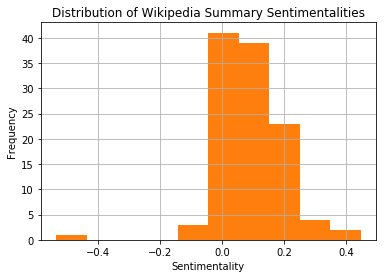

In [8]:
#Distribution of Wikipedia Sentimentalities
plot=show_sentimentality['Sentimentality'].hist()
plot.set_xlabel("Sentimentality")
plot.set_ylabel("Frequency")
plot.set_title("Distribution of Wikipedia Summary Sentimentalities")

plt.show()

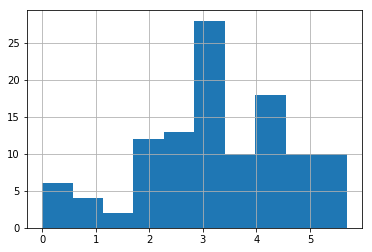

In [18]:
#log transform weeks 
Google_Headlines['Weeks'] = np.log(Google_Headlines['Weeks'])
Google_Headlines['Weeks'].hist()
plt.show()

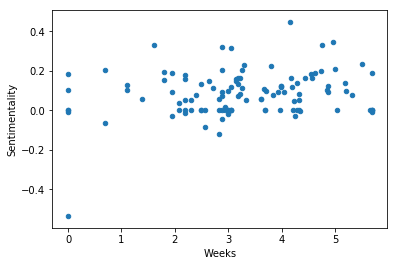

In [19]:
#Scatter plot
Google_Headlines.plot.scatter(x='Weeks', y='Sentimentality', rot=0)
plt.show()